# DATA PREPROCESSING OR FEATURE ENGINEERING 

In [1]:
# Data preprocessing or Feature Engineering - 
# Data preprocessing is the process of transforming the raw data into an understandable format.

#  Data preprocessing is divided into four stages: 1) data cleaning, 2) data integration (merges multiple sources into a single larger data), 
                                                 # 3) data transformation, 4) data reduction.

#1) Check for Duplicate variables or Columns
#2) Check for Single Value Columns, whole column only single value, like 1 1 1 1....or 0 0 0 0 ....
# Describe in Python min=0, max=0, mean=0,median=0 (procedure to identify)
#3) Missing Value Imputation - To be done only if atleast 70% of column data available.
# If a variable has greater than 70% missing values
# impute with words like "missing" or "Not Available"
# Numeric Variable - Mean or Median Imputation.
# Categorical or Non Numeric Variable - Most Frequent or Mode Imputation
# Algorithm based Imputation :-
#a) Multivariate Imputation using Chained Equations (MICE) - Both
# Numeric and Non Numeric Simultaneously
#b) Tree Based Imputation Methods - Decision Tree or Random Forest
#c) K Nearest Neighbors - KNN Imputer (Distance based )
# Probabilistic Principal Compoent Analaysis (PCA)
#4) Data Transformation - Dependent Variable and Independent Variables 
# Dependent Variable - if Skewness is there
# Positive Skewness - Logarithmic Transformation or Square root Transformation
# Negative Skewness - Exponential Transformation or Power Transformation
# Independent Variables -
# Standard Scaling  or Standardization - (x-mean)/std = Z Score
# Standard Scaling will be done when Independent Variables are in
# different Mathematical Units
# Normalization or Min MAx Scaling - (X-Xmin)/(Xmax-Xmin) will scale 
# all values in range of 0 & 1. No Negative Values
#5) Dummy Encoding of Non Numeric Categorical data- Assigning Numeric
# identifiers to categorical levels.
# Label Encoder - Encodes the Data in Single Column and assigns numeric
# identifiers from 0 in alphabetical order
# pd.get_dummies() - Create new columns based on number levels in 
# categorical data and uses binary encoding(No-0 & Yes-1)
#6) Correcting duplicate levels in Categorical Data.
#7) Create New variables from existing variables. Convert a numeric 
# variable into Categorical (high/medium/low)
#8) Reduce the number of levels in Categorical variable
#9) Extract information like year, month, quarter, week, weekday,
# holiday, season, from Date Variable. Calculate difference between
# 2 dates.
#10) Extract codes from Alpha Numeric Identifiers
# 11) Variable Selection or Feature Selection - can be done
# Covariance & Correlation
# Dimensionality Reduction Techniques - Principal Component Analysis
# Feature Selection Methods like SelectKBest methods
# Penalized Regression like LASSO
# Tree Based Models - Variable Importance

In [2]:
import io 
%cd "C:\Users\ADMIN\Desktop\PYTHON\BIGMART_ANALYTICSVIDYA"

C:\Users\ADMIN\Desktop\PYTHON\BIGMART_ANALYTICSVIDYA


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # ALL THE PLOTS WILL APPEAR HERE AFTER THE CELL OUTPUT.


UsageError: unrecognized arguments: # ALL THE PLOTS WILL APPEAR HERE AFTER THE CELL OUTPUT.


In [4]:
bigmarttrain=pd.read_csv("train_v9rqX0R.csv")

In [5]:
bigmarttest=pd.read_csv("test_AbJTz2l.csv")

In [6]:
print(bigmarttrain.shape)
print(bigmarttest.shape)

(8523, 12)
(5681, 11)


In [7]:
bigmarttrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
bigmarttrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
bigmarttest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [10]:
# For Preprocessing combine both train and test data. For Row concatenation
# since number of variables must be equal, add Dependent Variable to
# test data.
bigmarttest['Item_Outlet_Sales']='test' 

In [11]:
# here we r putting the test nd train data into a single dataframe. 
combinedf=pd.concat([bigmarttrain,bigmarttest],axis=0)
# axis=0 is row concatenation
# axis=1 is column concatenation

In [12]:
combinedf.shape

(14204, 12)

In [13]:
bigmarttest.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
bigmarttest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [15]:
combinedf.describe() ## this shows all the numeric columns except categorical columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [16]:
combinedf.isnull().sum().sort_values(ascending=False) ## is for finding out the sum of indivisual missing values in columns

Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
combinedf.Outlet_Size.value_counts(dropna=False) # different category counts with empty or null category too.

Medium    4655
NaN       4016
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [18]:
combinedf.Outlet_Size=combinedf.Outlet_Size.fillna("Missing") ### here we filled with missing bc we cant make our mind 
# to what impute here
# because here 3 existing category with differnt sum values . for that reason just fill it with name called Missing.

In [19]:
combinedf.Outlet_Size.value_counts(dropna=False)

Medium     4655
Missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [20]:
combinedf.isnull().sum().sort_values(ascending=False)

Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
combinedf.Item_Weight.describe()

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

In [22]:
combinedf.Item_Weight=combinedf.Item_Weight.fillna(combinedf.Item_Weight.median()) ## here imputed by median because here mean & median
# both r near to equall, we can go for anyone for the imputation.

In [23]:
combinedf.isnull().sum().sort_values(ascending=False)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
combinedf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
combinedf.Item_Identifier.head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [26]:
combinedf['Item_Code']=combinedf.Item_Identifier.apply(lambda x:x[0:2]) ## here using lambda we did slicing of the aplha-numeric 
# item_identifier variable

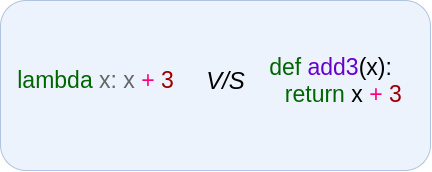

In [27]:
combinedf.Item_Code.value_counts() ## 3 categories i.e FD-food, NC- nonconsumables , DR- Drinks

FD    10201
NC     2686
DR     1317
Name: Item_Code, dtype: int64

In [28]:
combinedf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Code'],
      dtype='object')

In [29]:
combinedf.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales             object
Item_Code                     object
dtype: object

In [30]:
combinedf.Item_Fat_Content.value_counts() ## here low_fat of 3 different names nd regular of 2 different names, we have combined nd make it to 2 indivisual category

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [31]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(['LF','low fat'],'Low Fat') ## replaced to a single class or group name

In [32]:
combinedf.Item_Fat_Content=combinedf.Item_Fat_Content.replace(['reg','Regular'],'Regular')

In [33]:
combinedf.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [34]:
combinedf.Item_Visibility.describe() ## here min=0.00 means too many 0 are there , so it might create problem

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [35]:
zerovisible=combinedf[combinedf.Item_Visibility==0]

In [36]:
zerovisible.shape

(879, 13)

In [37]:
879/14204 ### the zeros are just 6% ,so not big problem ; if it is >10% then we will go for the visibilty factor to fix it

0.06188397634469164

In [38]:
combinedf.Item_Type.value_counts() ## no need to do anything here bc categories are less than 20

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [39]:
combinedf.Item_MRP.describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

In [40]:
combinedf.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [41]:
combinedf.Outlet_Establishment_Year.describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [42]:
combinedf['Outlet_Age']=2021-combinedf.Outlet_Establishment_Year

In [43]:
combinedf.Outlet_Age.describe()

count    14204.000000
mean        23.169319
std          8.371664
min         12.000000
25%         17.000000
50%         22.000000
75%         34.000000
max         36.000000
Name: Outlet_Age, dtype: float64

In [44]:
combinedf.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [45]:
combinedf.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

#  Label Encoding

In [46]:
numericcols=combinedf.select_dtypes(include=np.number)
objectcols=combinedf.select_dtypes(include=['object'])

In [52]:
print(numericcols)
print(objectcols)

      Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0            9.30         0.016047  249.8092                       1999   
1            5.92         0.019278   48.2692                       2009   
2           17.50         0.016760  141.6180                       1999   
3           19.20         0.000000  182.0950                       1998   
4            8.93         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
5676        10.50         0.013496  141.3154                       1997   
5677         7.60         0.142991  169.1448                       2009   
5678        10.00         0.073529  118.7440                       2002   
5679        15.30         0.000000  214.6218                       2007   
5680         9.50         0.104720   79.7960                       2002   

      Outlet_Age Item_Outlet_Sales  
0             22          3735.138  
1             12         

In [51]:
objectcols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Code'],
      dtype='object')

In [49]:
numericcols['Item_Outlet_Sales']=objectcols.Item_Outlet_Sales

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_6908/2433453598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericcols['Item_Outlet_Sales']=objectcols.Item_Outlet_Sales


In [54]:
objectcols=objectcols.drop('Item_Identifier',axis=1)
# axis= 1 is column dropping
# axis= 0 is row dropping

## regresion - getdummy, classification-lebal encoding

In [55]:
# dummy encode for non numeric object data
objectcolsdummy=pd.get_dummies(objectcols)

In [56]:
print(objectcols.shape)
print(objectcolsdummy.shape)

(14204, 7)
(14204, 42)


In [57]:
objectcols.head(3) # all the object data variables

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Code
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,FD
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,DR
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,FD


In [59]:
objectcolsdummy.head(10) ## data transformed into binary classifiers i.e 0 & 1  (dummy encoding)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
8,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
9,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [60]:
numericcols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Age', 'Item_Outlet_Sales'],
      dtype='object')

In [61]:
numericcols=numericcols.drop('Outlet_Establishment_Year',axis=1) ## column got dropped

In [62]:
combinedfclean=pd.concat([numericcols,objectcolsdummy],axis=1)

In [63]:
combinedfclean

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Code_DR,Item_Code_FD,Item_Code_NC
0,9.30,0.016047,249.8092,22,3735.138,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,12,443.4228,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,22,2097.27,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,23,732.38,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,34,994.7052,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,0.013496,141.3154,24,test,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5677,7.60,0.142991,169.1448,12,test,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5678,10.00,0.073529,118.7440,19,test,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
5679,15.30,0.000000,214.6218,14,test,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [64]:
combinedfclean.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Age                           int64
Item_Outlet_Sales                   object
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Iden

In [65]:
bigmarttraindf=combinedfclean[combinedfclean.Item_Outlet_Sales !="test"]  ## here we separated (Item_Outlet_Sales = test) from the dataset
bigmarttestdf=combinedfclean[combinedfclean.Item_Outlet_Sales =='test']

In [66]:
print(bigmarttraindf.shape)
print(bigmarttestdf.shape)

(8523, 47)
(5681, 47)


In [67]:
bigmarttestdf=bigmarttestdf.drop('Item_Outlet_Sales',axis=1) ## dropped the Item_Outlet_Sales from test dataset

In [69]:
bigmarttraindf.dtypes  ## here the Item_Outlet_Sales is in object , we need to convert into numeric

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Age                           int64
Item_Outlet_Sales                   object
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Iden

In [70]:
bigmarttraindf.Item_Outlet_Sales=pd.to_numeric(bigmarttraindf.Item_Outlet_Sales) # object to numeric(float)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [71]:
bigmarttraindf.Item_Outlet_Sales.dtypes

dtype('float64')

<AxesSubplot:ylabel='Item_Outlet_Sales'>

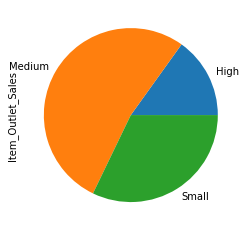

In [116]:
# piechart of total item_outlet_sales of item_size ?
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Size).sum().plot(kind="pie")

<AxesSubplot:ylabel='Item_Outlet_Sales'>

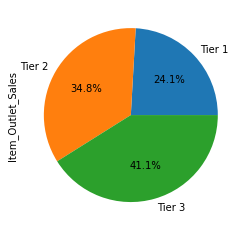

In [119]:
# piechart of total item_outlet_sales of outlet_location_type ?
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Location_Type).sum().plot(kind="pie",autopct='%1.1f%%') ## for percentage in 
# piechart the command is autopct='%1.1f%%'

<AxesSubplot:xlabel='Item_Type'>

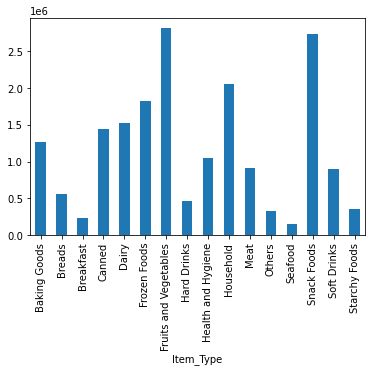

In [122]:
# barchart of total item_outlet_sales of item_type ?
bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Item_Type).sum().plot(kind="bar") 


In [101]:
# what is average item_outlet_sales for different outlet_type?

bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Type).mean()


Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

In [102]:
# NULL - THERE IS NO SIGNIFICANT DIFFRENCE IN AVERAGE Item_Outlet_Sales FOR DIFFRENT  Outlet_Type.
# ALT - THERE IS  SIGNIFICANT DIFFRENCE IN AVERAGE Item_Outlet_Sales FOR DIFFRENT  Outlet_Type.

In [106]:
gs=bigmarttrain[bigmarttrain.Outlet_Type=="Grocery Store"]
ST1=bigmarttrain[bigmarttrain.Outlet_Type=="Supermarket Type1"]
ST2=bigmarttrain[bigmarttrain.Outlet_Type=="Supermarket Type2"]
ST3=bigmarttrain[bigmarttrain.Outlet_Type=="Supermarket Type3"]

In [107]:
from scipy.stats import f_oneway  

In [108]:
f_oneway(gs.Item_Outlet_Sales,ST1.Item_Outlet_Sales,ST2.Item_Outlet_Sales,ST3.Item_Outlet_Sales)  ## ANOVA TEST

# statistic=894.6500119018012, P-VALUE=0.0 , WHICH IS LESS THAN 0.05 , REJECT NULL HYPOTHESIS.

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

In [109]:
# WHAT IS AVERAGE ITEM_OUTLET_SALES BY DIFFERENT OUTLET_LOCATION_TYPE ?

bigmarttrain.Item_Outlet_Sales.groupby(bigmarttrain.Outlet_Location_Type).mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [110]:
# NULL - THERE IS NO SIGNIFICANT DIFFRENCE IN AVERAGE Item_Outlet_Sales FOR DIFFRENT  Outlet_location_type.
# ALT - THERE IS  SIGNIFICANT DIFFRENCE IN AVERAGE Item_Outlet_Sales FOR DIFFRENT outlet_location_type.

In [111]:
T1=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 1"]
T2=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 2"]
T3=bigmarttrain[bigmarttrain.Outlet_Location_Type=="Tier 3"]

In [112]:
f_oneway(T1.Item_Outlet_Sales,T2.Item_Outlet_Sales,T3.Item_Outlet_Sales)

# statistic=53.947739874560675, p-value=5.2228172988842975e-24, which is less than 0.05 , reject null hypothesis.

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

In [113]:
# test null no association btn outlet_type & outlet_location_type ?
## cross tab

pd.crosstab(bigmarttrain.Outlet_Type,bigmarttrain.Outlet_Location_Type)

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


In [ ]:
# NULL - THERE IS NO association btn these 2 variables
# ALT - THERE IS association btn these 2 variables.

In [114]:
from scipy.stats import chi2_contingency

In [115]:
chi2_contingency(pd.crosstab(bigmarttrain.Outlet_Type,bigmarttrain.Outlet_Location_Type))

## statistics=4725.606588766826 , P-value =0.0, which is less than 0.05 , reject null hypothesis. 

(4725.606588766826,
 0.0,
 6,
 array([[ 303.43822598,  353.88419571,  425.67757832],
        [1562.58078141, 1822.35656459, 2192.062654  ],
        [ 260.00985568,  303.23594978,  364.75419453],
        [ 261.97113692,  305.52328992,  367.50557315]]))

In [72]:
y=bigmarttraindf.Item_Outlet_Sales  ## lowercase y, small y is represented dependent variable in statistics
X=bigmarttraindf.drop('Item_Outlet_Sales',axis=1)  ## uppercase x, big X is represented independent variables in statistics

<AxesSubplot:ylabel='Frequency'>

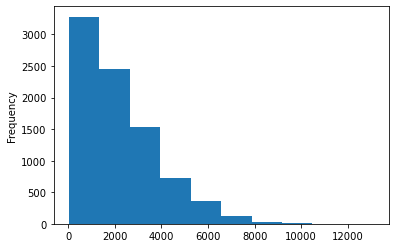

In [75]:
y.plot(kind="hist")

<AxesSubplot:>

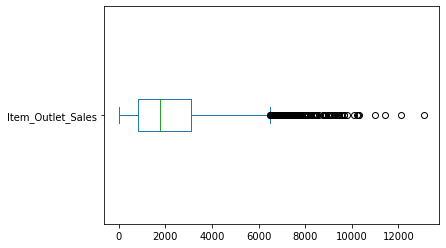

In [76]:
y.plot(kind="box",vert=False) ## outlies are in max side means Item_Outlet_Sales ,store are performing excellence in this sides

<AxesSubplot:ylabel='Density'>

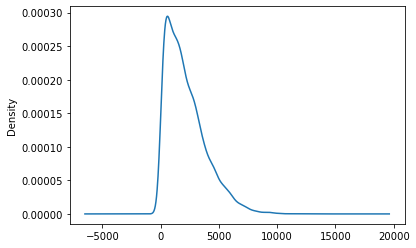

In [77]:
y.plot(kind="density") ## positive skewness,kurtosis is there

In [80]:
print(y.skew())


1.1775306028542796


In [82]:
print(y.kurt()) ## kurtosis = 3 means no kurtosis , so dont do in real life dataset as well as dont do zero the skewness also , 
# just minimizes the skewness,kurtosis

1.6158766814287264


In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
reg=LinearRegression()

In [86]:
regmodel=reg.fit(X,y)

In [87]:
regmodel.score(X,y) ## R SQUARE VALUE , IN PYTHON WE DONT GET ADJ R SQUARE VALUE 

0.5637737001510252

In [89]:
regmodel.intercept_

-577.1596763296538

In [98]:
print(list(zip(X.columns,regmodel.coef_)))

[('Item_Weight', -0.5200273627393321), ('Item_Visibility', -300.0670763008119), ('Item_MRP', 15.57063578983275), ('Outlet_Age', 14.374228480420708), ('Item_Fat_Content_Low Fat', -21.05916619545118), ('Item_Fat_Content_Regular', 21.059166195452416), ('Item_Type_Baking Goods', -3.210471001845551), ('Item_Type_Breads', 1.925037820624027), ('Item_Type_Breakfast', 3.983965053682618), ('Item_Type_Canned', 22.271905888702232), ('Item_Type_Dairy', -53.004465862765336), ('Item_Type_Frozen Foods', -31.253550501579387), ('Item_Type_Fruits and Vegetables', 26.51372579752438), ('Item_Type_Hard Drinks', -47.260780097696184), ('Item_Type_Health and Hygiene', 4.423071407523755), ('Item_Type_Household', -24.342665740884406), ('Item_Type_Meat', -3.858079857795694), ('Item_Type_Others', -6.538845577655773), ('Item_Type_Seafood', 181.66630948761477), ('Item_Type_Snack Foods', -14.608311286518926), ('Item_Type_Soft Drinks', -74.89160051671534), ('Item_Type_Starchy Foods', 18.184754987792438), ('Outlet_Iden

In [91]:
regpredict=regmodel.predict(X)

In [92]:
regpredict

array([4009.76011104,  562.5129848 , 2369.82262179, ..., 1525.94416664,
       1394.19304552, 1209.38313357])

In [93]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [95]:
regresidual=y-regpredict

In [96]:
regresidual.head() ## residual= actual - ppredicted value

0   -274.622111
1   -119.090185
2   -272.552622
3   -341.004532
4     85.776022
Name: Item_Outlet_Sales, dtype: float64

In [99]:
np.sqrt(np.mean(regresidual**2)) # RMSE=1127.0330147429918

1127.0330147429918